In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\user\cleaned_recruitment_data.csv")  # Replace with your actual file name


In [3]:
df.head()

,name,rating,reviews,company_type,Head_Quarters,Company_Age,No_of_Employee,company description,salaries,no. of job opening
0,TCS,3.9,(32.5k Reviews),Public,"Mumbai,Maharashtra + 217 more",54 years old,1 Lakh+ employees (India),IT Services & Consulting | 1 Lakh+ Employees |...,733.7k Salaries,45 Jobs
1,Accenture,4.0,(22.5k Reviews),Public,"Dublin,Dublin + 125 more",33 years old,1 Lakh+ employees (India),IT Services & Consulting | 1 Lakh+ Employees |...,513.5k Salaries,13.1k Jobs
2,Cognizant,3.9,(20.8k Reviews),Private,"Teaneck,New Jersey + 78 more",28 years old,1 Lakh+ employees (India),IT Services & Consulting | 1 Lakh+ Employees |...,496.7k Salaries,510 Jobs
3,ICICI Bank,4.0,(27.7k Reviews),Public,"Mumbai,Maharashtra + 925 more",28 years old,50k-1 Lakh employees (India),Banking | 1 Lakh+ Employees | Public | 29 year...,137.2k Salaries,194 Jobs
4,HDFC Bank,4.0,(28.4k Reviews),Public,"Mumbai,Maharashtra + 1007 more",28 years old,1 Lakh+ employees (India),Banking | 1 Lakh+ Employees | Public | 29 year...,125.7k Salaries,403 Jobs


In [4]:
print(df.isnull().sum())  # Check for null values


name                     0
rating                   0
reviews                  0
company_type             7
Head_Quarters           49
Company_Age            145
No_of_Employee         823
company description      0
salaries                 0
no. of job opening       0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4057 entries, 0 to 4056
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 4057 non-null   object 
 1   rating               4057 non-null   float64
 2   reviews              4057 non-null   object 
 3   company_type         4050 non-null   object 
 4   Head_Quarters        4008 non-null   object 
 5   Company_Age          3912 non-null   object 
 6   No_of_Employee       3234 non-null   object 
 7   company description  4057 non-null   object 
 8   salaries             4057 non-null   object 
 9   no. of job opening   4057 non-null   object 
dtypes: float64(1), object(9)
memory usage: 317.1+ KB


In [24]:
df['company_type'] = df['company_type'].fillna('Unknown')
df['Head_Quarters'] = df['Head_Quarters'].fillna('Unknown')
df['No_of_Employee'] = df['No_of_Employee'].fillna('Unknown')
df['Company_Age'] = df['Company_Age'].fillna(df['Company_Age'].median())


In [25]:
# Fill missing categorical values with "Unknown"
df['company_type'].fillna('Unknown', inplace=True)
df['Head_Quarters'].fillna('Unknown', inplace=True)
df['No_of_Employee'].fillna('Unknown', inplace=True)

# Convert 'Company_Age' to numeric and fill missing with median
df['Company_Age'] = df['Company_Age'].astype(str).str.extract(r'(\d+)').astype(float)
df['Company_Age'].fillna(df['Company_Age'].median(), inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_4972\1380532750.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company_type'].fillna('Unknown', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4972\1380532750.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [7]:
import pandas as pd

# Fill missing categorical values
df = df.copy()  # Ensures we work on a proper copy to avoid warnings
df['company_type'] = df['company_type'].fillna('Unknown')
df['Head_Quarters'] = df['Head_Quarters'].fillna('Unknown')
df['No_of_Employee'] = df['No_of_Employee'].fillna('Unknown')

# Extract numerical part from "Company_Age" and convert to float
df['Company_Age'] = df['Company_Age'].astype(str).str.extract(r'(\d+)').astype(float)

# Fill missing "Company_Age" with median value
df['Company_Age'] = df['Company_Age'].fillna(df['Company_Age'].median())


In [8]:
df.describe(include='all')

,name,rating,reviews,company_type,Head_Quarters,Company_Age,No_of_Employee,company description,salaries,no. of job opening
count,4057,4057.000000,4057,4057,4057,4057.000000,4057,4057,4057,4057
unique,4045,NaN,664,615,2354,NaN,22,4057,986,241
top,Funskool India,NaN,(60 Reviews),Private,Unknown,NaN,Unknown,IT Services & Consulting | 1 Lakh+ Employees |...,1.1k Salaries,-- Jobs
freq,2,NaN,48,2463,49,NaN,823,1,145,1476
mean,NaN,3.893148,NaN,NaN,NaN,60.179936,NaN,NaN,NaN,NaN
std,NaN,0.394348,NaN,NaN,NaN,96.286071,NaN,NaN,NaN,NaN
min,NaN,1.900000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,3.700000,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN
50%,NaN,3.900000,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
75%,NaN,4.200000,NaN,NaN,NaN,53.000000,NaN,NaN,NaN,NaN


In [9]:
df.mode().iloc[0]

name                                                      Biorad Medisys
rating                                                               4.1
reviews                                                     (60 Reviews)
company_type                                                     Private
Head_Quarters                                                    Unknown
Company_Age                                                         30.0
No_of_Employee                                                   Unknown
company description    1 Lakh+ Employees | Conglomerate | 57 years ol...
salaries                                                   1.1k Salaries
no. of job opening                                               -- Jobs
Name: 0, dtype: object

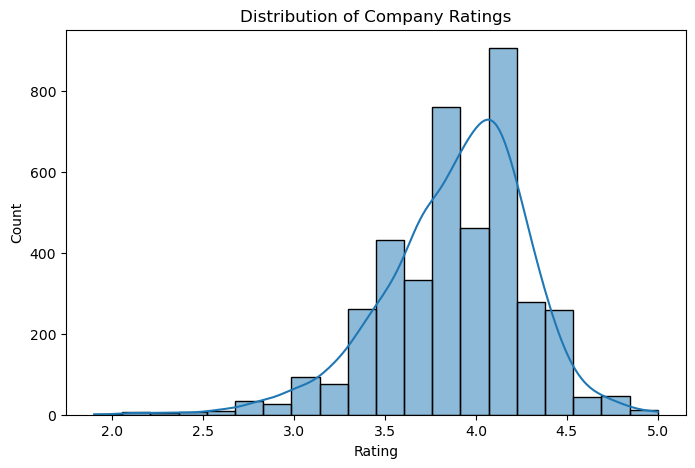

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Company Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [11]:
print(df.nlargest(10, 'rating')[['name', 'rating']])  # Top 10
print(df.nsmallest(10, 'rating')[['name', 'rating']])  # Bottom 10


                  name  rating
570   Glorious Insight     5.0
1202         Appsierra     5.0
2971       Teqtous Inc     5.0
3465            Ekeeda     5.0
3627     ShapeMySkills     5.0
3886            6Sense     5.0
1178            Aurigo     4.9
1477     Mayoor School     4.9
2284   Wintax Solution     4.9
3491               J&F     4.9
                    name  rating
2735  GETIT Infoservices     1.9
1186       Lido Learning     2.1
2245          ValGenesis     2.1
3414       My Eco Energy     2.1
3584   Spc Life Sciences     2.1
1449        Health Total     2.2
3499        NDS InfoServ     2.2
2176        Bell Finvest     2.3
2333             Doshion     2.3
2584           Mindcrest     2.3


In [12]:
df.groupby('company_type')['Company_Age'].mean().sort_values(ascending=False)
df.groupby('company_type')['No_of_Employee'].value_counts().head(10)


company_type                            No_of_Employee
11-50 employees (India)                 Unknown           1
51-200 employees (Global)               Unknown           1
51-200 employees (India)                Unknown           1
Aachen,North Rhine-Westphalia + 1 more  Unknown           1
Abu Dhabi + 9 more                      Unknown           1
Abu Dhabi,Dubai + 58 more               Unknown           1
Abu Dhabi,Gauteng + 9 more              Unknown           1
Acton,Massachusetts + 1 more            Unknown           1
Ageo + 1 more                           Unknown           1
Ahmadi + 8 more                         Unknown           1
Name: count, dtype: int64

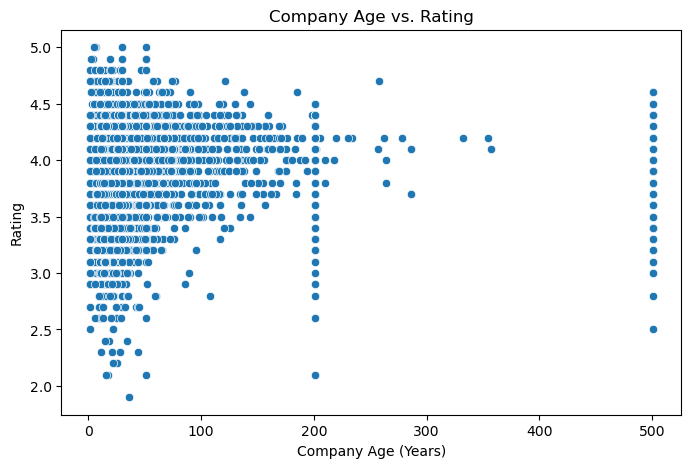

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Company_Age'], y=df['rating'])
plt.title('Company Age vs. Rating')
plt.xlabel('Company Age (Years)')
plt.ylabel('Rating')
plt.show()


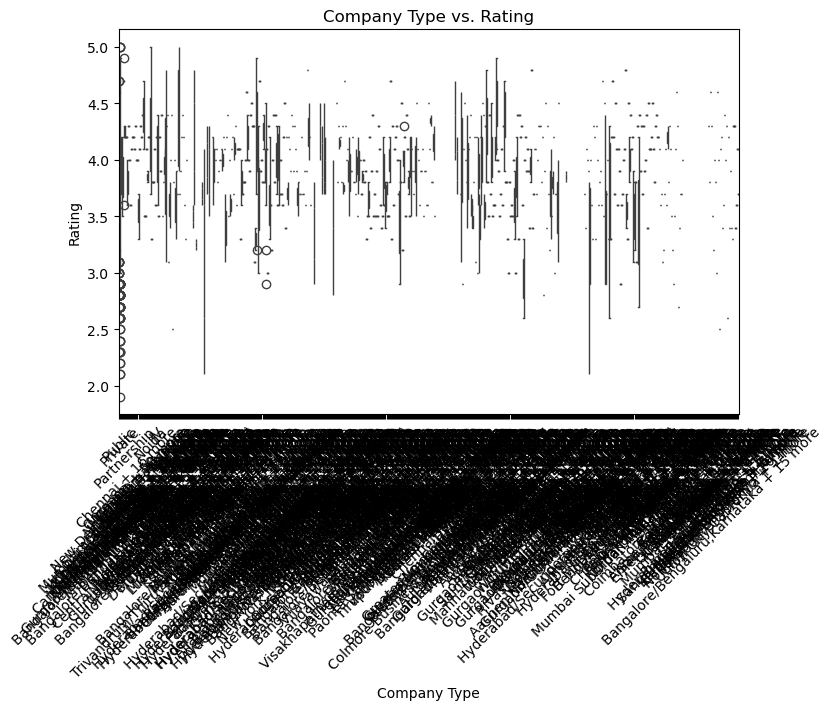

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='company_type', y='rating', data=df)
plt.title('Company Type vs. Rating')
plt.xlabel('Company Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


In [16]:
!pip install wordcloud


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.2 kB 245.8 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/301.2 kB 403.5 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.2 kB 516.7 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/301.2 kB 619.5 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/301.2 kB 749.3 kB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 775.9 kB/s eta 0:00:00


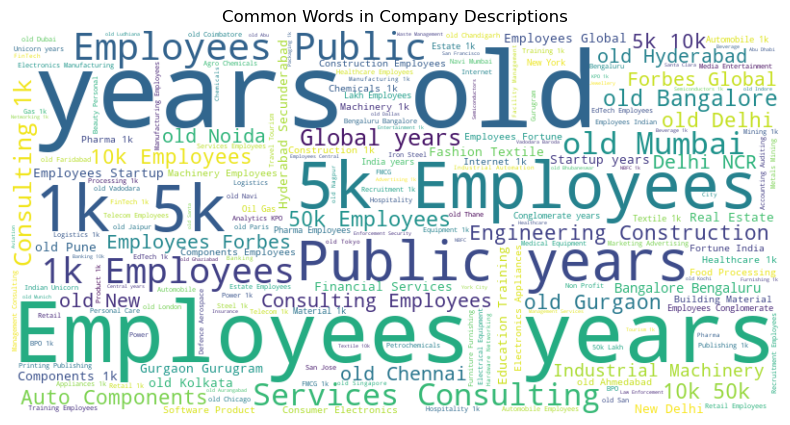

In [17]:
from wordcloud import WordCloud

text = ' '.join(df['company description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Company Descriptions')
plt.show()
